# Covid-19 - India Reports

# Global Pandemic

With China reporting more than 70k cases of the virus and cases being reported from over 100 countries icluding the USA, Australia, Cambodia, Canada, Italy, Japan, France, Malaysia, Japan, South Korea, Thailand, etc.. with a global total of confirmed cases being 182,997 the World Health Organization has declared the crisis as a Pandemic. Furthermore, 7,174 people have already died due to this deadly viral infection. 

## India Reports

In several cities, many people having symptoms of the virus infection are kept under observation in hospitals. According to WHO till the 17th of March a total of 129 COVID-19 cases have been reported in India. They include 112 Indian nationals, 17 foreign nationals, 10 recovered and 2 deaths. State-wise cases of COVID-19 have been reported from 13 States/UTs: Andhra Pradesh (1 case), Delhi (7 cases), Haryana (14 cases), Jammu & Kashmir (2 cases), Karnataka (6 cases), Kerala (24 cases), Ladakh (3 cases), Maharashtra (33 cases), Punjab (1 case), Rajasthan (4 cases), Telangana (3 cases), Tamil Nadu (1 case), Uttar Pradesh (12 cases) and Odisha (1 case).

**The Govt. helpline number: 011-239 78046, will remain operational. Besides the toll-free numbers,the ministry also issued a helpline email ID - ncov2019@gmail.com.**

Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/health-ministry-launches-new-toll-free-number-email-id-for-queries-on-covid-19/articleshow/74661190.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


## Previous Work on Covid-19
1. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geo-statistical-analysis
2. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geographical-analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv
/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx
/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [2]:
# import the necessary libraries

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import pycountry
import folium 
from folium import plugins


%config InlineBackend.figure_format = 'retina'
py.init_notebook_mode(connected=True)

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow


# Utility Functions

'''Display markdown formatted output like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))


'''highlight the maximum in a Series or DataFrame'''  
def highlight_max(data, color='red'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
      


In [3]:
covid_19_India = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
population_India_census2011 = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")

covid_19_India.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [4]:
covid_19_India['Confirmed'] = covid_19_India['ConfirmedIndianNational'] + covid_19_India['ConfirmedForeignNational']
covid_19_India.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)

covid_19_India.head()

,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,30/01/20,Kerala,1,0,0,0,1
1,2,31/01/20,Kerala,1,0,0,0,1
2,3,01/02/20,Kerala,2,0,0,0,2
3,4,02/02/20,Kerala,3,0,0,0,3
4,5,03/02/20,Kerala,3,0,0,0,3


In [5]:
covid_India_cases = pd.read_csv('../input/coronavirus-cases-in-india/Covid cases in India.csv')

# Coordinates of Indian States
India_Lat_Lon = pd.read_csv('../input/coronavirus-cases-in-india/Indian Coordinates.csv')

# Day by day data
dbd_India = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='India')
dbd_Italy = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Italy")
dbd_Korea = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Korea")

In [6]:
covid_India_cases['TotalConfirmed'] = covid_India_cases['Total Confirmed cases (Indian National)'] + covid_India_cases['Total Confirmed cases ( Foreign National )']
covid_India_cases.rename(columns={'Name of State / UT': 'State', 'Cured/Discharged/Migrated': 'Recovered'}, inplace=True)
covid_India_cases.style.apply(highlight_max,subset=['Recovered', 'Deaths','TotalConfirmed'])

,S. No.,State,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Deaths,TotalConfirmed
0,1,Andhra Pradesh,3,0,0,0,3
1,2,Chattisgarh,1,0,0,0,1
2,3,Delhi,25,1,5,1,26
3,4,Gujarat,7,0,0,0,7
4,5,Haryana,3,14,0,0,17
5,6,Himachal Pradesh,2,0,0,0,2
6,7,Karnataka,15,0,1,1,15
7,8,Kerala,33,7,3,0,40
8,9,Madhya Pradesh,4,0,0,0,4
9,10,Maharashtra,60,3,0,1,63


In [7]:
fig = px.bar(covid_India_cases.sort_values('TotalConfirmed', ascending=False).sort_values('TotalConfirmed', ascending=True), 
             x="TotalConfirmed", y="State", title='Total Confirmed Cases', text='TotalConfirmed', orientation='h', 
             width=700, height=700, range_x = [0, max(covid_India_cases['TotalConfirmed']) + 2])
fig.update_traces(marker_color='#0726ed', opacity=0.8, textposition='outside')

fig.update_layout(plot_bgcolor='rgb(208, 236, 245)')
fig.show()

In [8]:
date_wise_data = covid_19_India[["Date","Confirmed","Deaths","Recovered"]]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
...,...,...,...,...
288,2020-03-22,4,0,0
289,2020-03-22,13,0,0
290,2020-03-22,27,0,9
291,2020-03-22,3,0,0


In [9]:
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data

***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
5,2020-02-04,3,0,0
6,2020-02-05,3,0,0
7,2020-02-06,3,0,0
8,2020-02-07,3,0,0
9,2020-02-08,3,0,0


In [10]:
temp = date_wise_data.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
# temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.show()

# formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
# date_wise_data.plot('Date',['Confirmed', 'Deaths', 'Recovered'],figsize=(10,10), rot=30)

In [11]:
India_Lat_Lon.rename(columns={'Name of State / UT': 'State'}, inplace=True)
India_Lat_Lon.head()

,State,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [12]:
Covid_India_With_Location = pd.merge(India_Lat_Lon,covid_India_cases,on='State')

India_Latitude = 21.7679
India_Longitude = 78.8718            
                   
India = folium.Map(location = [India_Latitude,India_Longitude], zoom_start = 5,tiles = 'cartodbpositron')

for lat, long, confirmed, deaths, recovered, state in zip(Covid_India_With_Location['Latitude'],
                                                           Covid_India_With_Location['Longitude'],
                                                           Covid_India_With_Location['TotalConfirmed'],
                                                           Covid_India_With_Location['Deaths'],
                                                           Covid_India_With_Location['Recovered'], 
                                                           Covid_India_With_Location['State']):

    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>Country:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(India)

    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>Country:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(India)
        
India


In [13]:
statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['TotalConfirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" # in order to have a single root node
fig = px.treemap(statewise_cases, path=['Country','State'], values='TotalConfirmed',
                  color='TotalConfirmed', hover_data=['State'],
                  color_continuous_scale='RdBu')
fig.show()

In [14]:
covid_19_India['Confirmed'] = covid_19_India['ConfirmedIndianNational'] + covid_19_India['ConfirmedForeignNational']
covid_19_India.head()


,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,30/01/20,Kerala,1,0,0,0,1
1,2,31/01/20,Kerala,1,0,0,0,1
2,3,01/02/20,Kerala,2,0,0,0,2
3,4,02/02/20,Kerala,3,0,0,0,3
4,5,03/02/20,Kerala,3,0,0,0,3


In [15]:
# Affected States

nCoV_States = covid_19_India['State/UnionTerritory'].unique().tolist()
print('\n')
print(nCoV_States)
print("\n------------------------------------------------------------------")
print("\nTotal States affected by nCoV: ",len(nCoV_States))

KeyError: 'State/UnionTerritory'

***Confirmed Cases vs Day***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text xticklabel objects>)

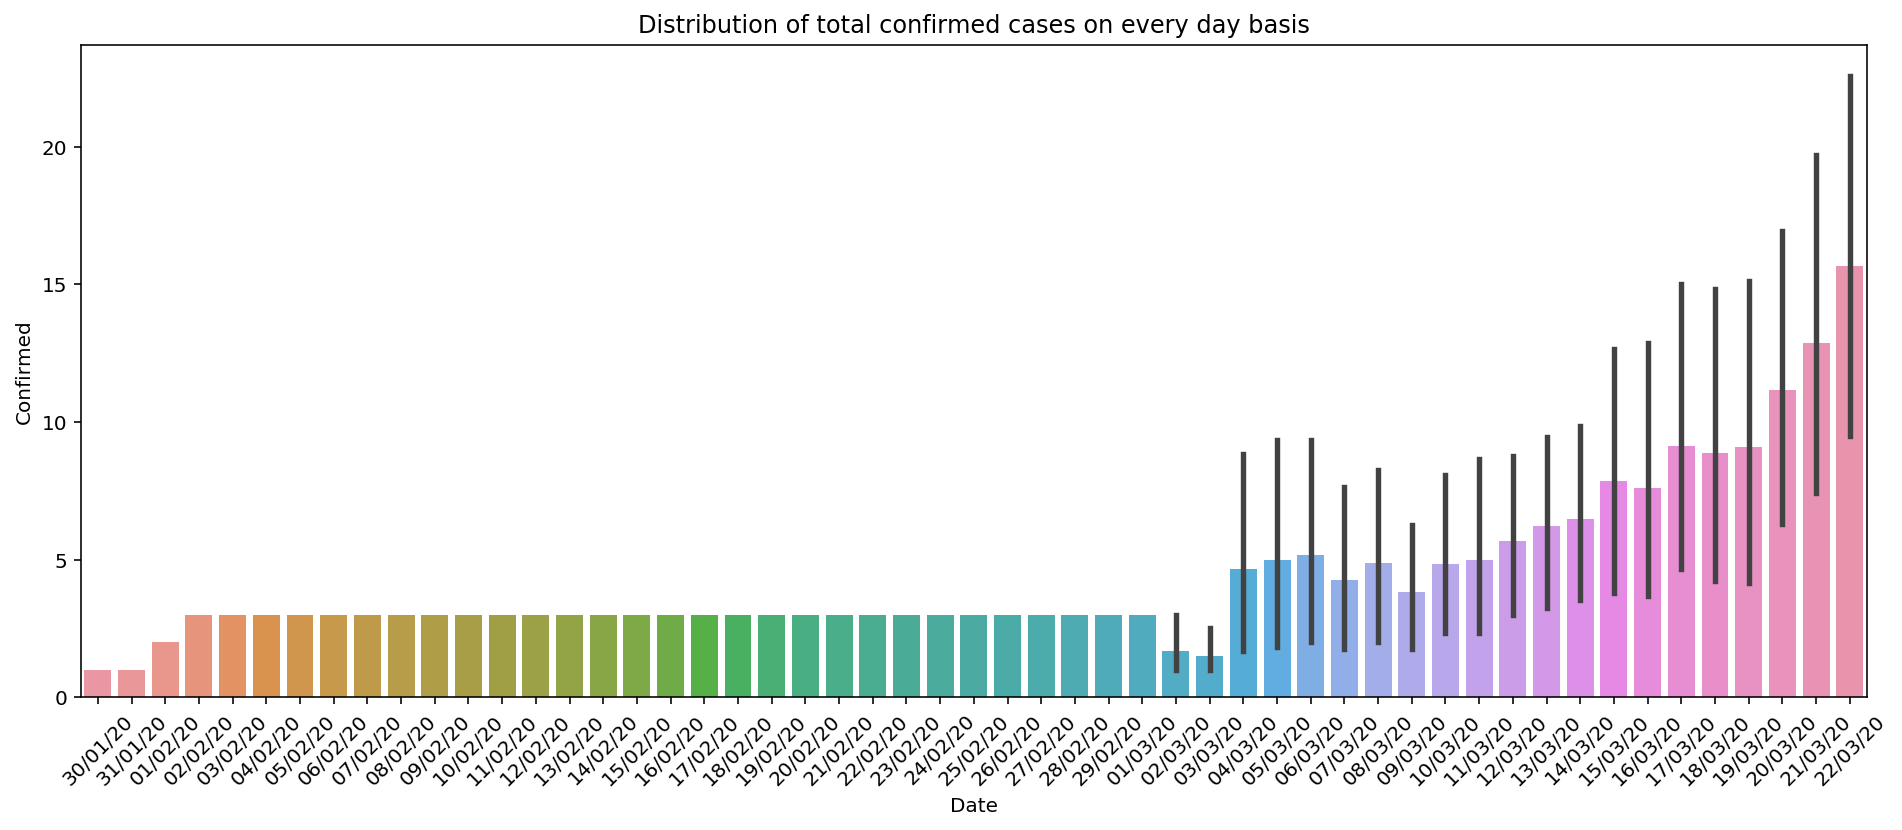

In [16]:
formatted_text('***Confirmed Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Confirmed',data=covid_19_India, order=covid_19_India.Date.unique().tolist())
plt.title('Distribution of total confirmed cases on every day basis')
plt.xticks(rotation=45)

In [17]:
# formatted_text('***Day wise distribution for Confirmed, Deaths and Recovered Cases***')
# covid_19_India.plot('Date',['Confirmed', 'Deaths', 'Cured'],figsize=(30,10), rot=30)

In [18]:
print(covid_19_India.shape)

(293, 8)


An initial level analysis. This will be updated ...